In [ ]:
Course: https://course.fast.ai/Lessons/lesson2.html

In [7]:
from fastcore.all import *
import time

def search_images_ddg(term, max_images=150):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [28]:
ims = search_images_ddg('grizzly bear')

len(ims)

50

In [29]:
from fastdownload import download_url
from fastai.vision.all import *

dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

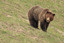

In [30]:

im = Image.open(dest)
im.to_thumb(64,64)



In [31]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [39]:
if not path.exists():
    path.mkdir()

for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest, urls=results)

In [41]:
fns = get_image_files(path)

In [42]:
failed = verify_images(fns)

In [43]:
failed.map(Path.unlink);